In [1]:
pip install wandb

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import wandb

# Specify your Weights & Biases project and run
project = "YOLOv8"
run_id = "84gz72dc"

# Initialize Weights & Biases run
run = wandb.init(project=project, resume=run_id)

# Replace with your actual artifact name and version
artifact_name = "smart_exploration/YOLOv8/run_g5v7q6wf_model:v0"

# Fetch the model file from Weights & Biases
artifact = run.use_artifact(artifact_name)
artifact_dir = artifact.download()

# Load the YOLOv8 model
model_path = f"{artifact_dir}/yolov8m-seg.pt"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model
model = torch.load(model_path, map_location=device)

# Set the model to evaluation mode
model.eval()

# Perform inference, preprocess input image, etc.
# ...

# Close the Weights & Biases run
run.finish()


wandb: Downloading large artifact run_g5v7q6wf_model:v0, 52.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.3


AttributeError: 'dict' object has no attribute 'eval'

In [4]:
import torch
import wandb

# Specify your Weights & Biases project and run
project = "YOLOv8"
run_id = "84gz72dc"

# Initialize Weights & Biases run
run = wandb.init(project=project, resume=run_id)

# Replace with your actual artifact name and version
artifact_name = "smart_exploration/YOLOv8/run_g5v7q6wf_model:v0"

# Fetch the model file from Weights & Biases
artifact = run.use_artifact(artifact_name)
artifact_dir = artifact.download()

# Load the YOLOv8 model (as a dictionary)
model_dict = torch.load(f"{artifact_dir}/yolov8m-seg.pt", map_location='cuda' if torch.cuda.is_available() else 'cpu')

# Extract the model from the dictionary
model = model_dict['model']

# Set the model to evaluation mode
model.eval()

# Perform inference, preprocess input image, etc.
# ...

# Close the Weights & Biases run
run.finish()


wandb: Downloading large artifact run_g5v7q6wf_model:v0, 52.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.4


wandb: Downloading large artifact run_g5v7q6wf_model:v0, 52.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.3


RuntimeError: "upsample_nearest2d_channels_last" not implemented for 'Half'

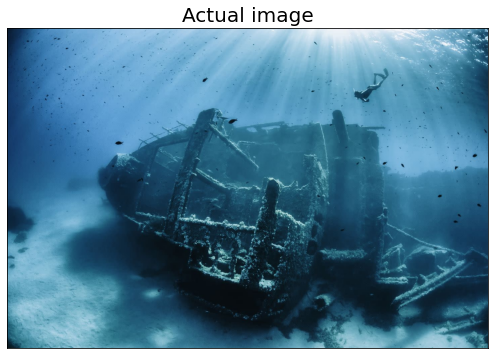

In [15]:
import torch
import wandb
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os
import random
from torchvision import transforms

# Specify your Weights & Biases project and run
project = "YOLOv8"
run_id = "84gz72dc"

# Initialize Weights & Biases run
run = wandb.init(project=project, resume=run_id)

# Replace with your actual artifact name and version
artifact_name = "smart_exploration/YOLOv8/run_g5v7q6wf_model:v0"

# Fetch the model file from Weights & Biases
artifact = run.use_artifact(artifact_name)
artifact_dir = artifact.download()

# Load the YOLOv8 model (as a dictionary)
model_dict = torch.load(f"{artifact_dir}/yolov8m-seg.pt", map_location='cuda' if torch.cuda.is_available() else 'cpu')

# Extract the model from the dictionary
model = model_dict['model']

# Set the model to evaluation mode
model.eval()

# Specify the path to your test images
op_images_testpath = 'predict/'

plt.figure(figsize=(20, 20))

# Assuming os.listdir(op_images_testpath) is the list of test images
test_imgs_list = os.listdir(op_images_testpath)

for i in range(1, 6, 2):
    m = random.randint(0, len(test_imgs_list) - 1)  # Selecting a random image number from the test dataset
    test_image = os.path.join(op_images_testpath, test_imgs_list[m])

    ax = plt.subplot(3, 2, i)

    # Display actual image
    plt.imshow(cv2.cvtColor(cv2.imread(test_image), cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.title("Actual image", fontsize=20)

    # Preprocess the image and convert to tensor
    transform = transforms.Compose([
        transforms.Resize((640, 640)),  # Adjust size as needed
        transforms.ToTensor(),
    ])
    input_tensor = transform(Image.open(test_image)).unsqueeze(0)

    # Convert input tensor to half precision
    input_tensor = input_tensor.half()

    # Convert model parameters to half precision
    model = model.half()

    # Predict
    with torch.no_grad():
        results = model(input_tensor)

    ax = plt.subplot(3, 2, i + 1)

    # Display image with predictions using YOLOv8 plotting
    results.show()  # This assumes that YOLOv8 result is a YOLO class
    plt.title("Image with predictions", fontsize=20)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

# Close the Weights & Biases run
run.finish()


wandb: Downloading large artifact run_g5v7q6wf_model:v0, 52.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.3


TypeError: conv2d() received an invalid combination of arguments - got (str, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mstr[0m, [31;1mParameter[0m, [31;1mNoneType[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [32;1mint[0m)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mstr[0m, [31;1mParameter[0m, [31;1mNoneType[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [32;1mint[0m)


<Figure size 1440x1440 with 0 Axes>

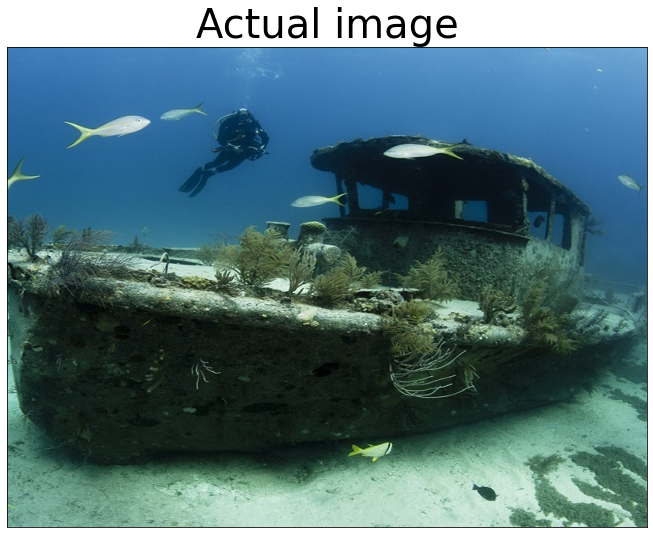

In [2]:
import torch
import wandb
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os
import random
from torchvision import transforms

# Specify your Weights & Biases project and run
project = "YOLOv8"
run_id = "84gz72dc"

# Initialize Weights & Biases run
run = wandb.init(project=project, resume=run_id)

# Replace with your actual artifact name and version
artifact_name = "smart_exploration/YOLOv8/run_g5v7q6wf_model:v0"

# Fetch the model file from Weights & Biases
artifact = run.use_artifact(artifact_name)
artifact_dir = artifact.download()

# Load the YOLOv8 model (as a dictionary)
model_dict = torch.load(f"{artifact_dir}/yolov8m-seg.pt", map_location='cuda' if torch.cuda.is_available() else 'cpu')

# Extract the model from the dictionary
model = model_dict['model']

# Set the model to evaluation mode
model.eval()

# Specify the path to your test images
test_images_path = 'predict/'

plt.figure(figsize=(20, 20))



# Assuming os.listdir(op_images_testpath) is the list of test images
test_imgs_list = sorted(os.listdir(test_images_path))


plt.figure(figsize=(30,30))

for i in range(1,6,2):
    m=random.randint(0, len(test_imgs_list)) # Selecting random image number from test dataset
    test_image=os.path.join(op_images_testpath, os.listdir(test_images_path)[m])
    ax=plt.subplot(3,2,i)
    
    # Display actual image
    plt.imshow(cv2.cvtColor(cv2.imread(test_image), cv2.COLOR_BGR2RGB)) 
    plt.xticks([])
    plt.yticks([])
    plt.title("Actual image", fontsize = 40)
    
    # Predict 
    res = model(test_image)
    res_plotted = res[0].plot()
    ax=plt.subplot(3,2,i+1)
    
    # Display image with predictions
    plt.imshow(res_plotted)
    plt.title("Image with predictions", fontsize = 40)
    plt.xticks([])
    plt.yticks([])

In [4]:
from ultralytics import YOLO

In [5]:
model = YOLO("weights/best.pt")

from PIL import Image
import cv2
img = cv2.imread("predict/w_r_111_.jpg")
prediction = model.predict(img)[0]

prediction

WARNING ⚠️ weights/best.pt appears to require 'dill', which is not in ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ---------------------------------------- 116.3/116.3 kB 3.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.6s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 480x640 2 Backgrounds, 1 Human divers, 1 Wrecks and ruins, 5 Fish and vertebratess, 930.9ms
Speed: 9.5ms preprocess, 930.9ms inference, 48.8ms postprocess per image at shape (1, 3, 480, 640)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Background', 1: 'Human divers', 2: 'Aquatic plants and sea-grass', 3: 'Wrecks and ruins', 4: 'Robots', 5: 'Reefs and invertebrates', 6: 'Fish and vertebrates', 7: 'Sea-floor and rocks'}
obb: None
orig_img: array([[[183, 123,  63],
        [183, 123,  63],
        [184, 124,  64],
        ...,
        [214, 169, 112],
        [213, 170, 113],
        [214, 171, 114]],

       [[184, 124,  64],
        [184, 124,  64],
        [184, 124,  64],
        ...,
        [215, 170, 113],
        [213, 170, 113],
        [213, 170, 113]],

       [[184, 124,  64],
        [184, 124,  64],
        [184, 124,  64],
        ...,
        [215, 170, 113],
        [215, 170, 113],
        [215, 170, 113]],

       ...,

       [[155, 169, 115],
        [151, 167, 113],
        [146, 162, 109],
        ...,
        [ 94, 12


image 1/1 C:\Users\harsh\OneDrive\Desktop\real\predict\f_r_392_.jpg: 480x640 1 Fish and vertebrates, 1 Sea-floor and rocks, 870.5ms
Speed: 2.2ms preprocess, 870.5ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\harsh\OneDrive\Desktop\real\predict\d_r_233_.jpg: 480x640 3 Backgrounds, 1 Human divers, 1 Robots, 1 Reefs and invertebrates, 791.7ms
Speed: 2.0ms preprocess, 791.7ms inference, 11.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\harsh\OneDrive\Desktop\real\predict\w_r_10_.jpg: 480x640 2 Backgrounds, 2 Human diverss, 1 Wrecks and ruins, 4 Sea-floor and rockss, 859.7ms
Speed: 3.0ms preprocess, 859.7ms inference, 23.9ms postprocess per image at shape (1, 3, 480, 640)


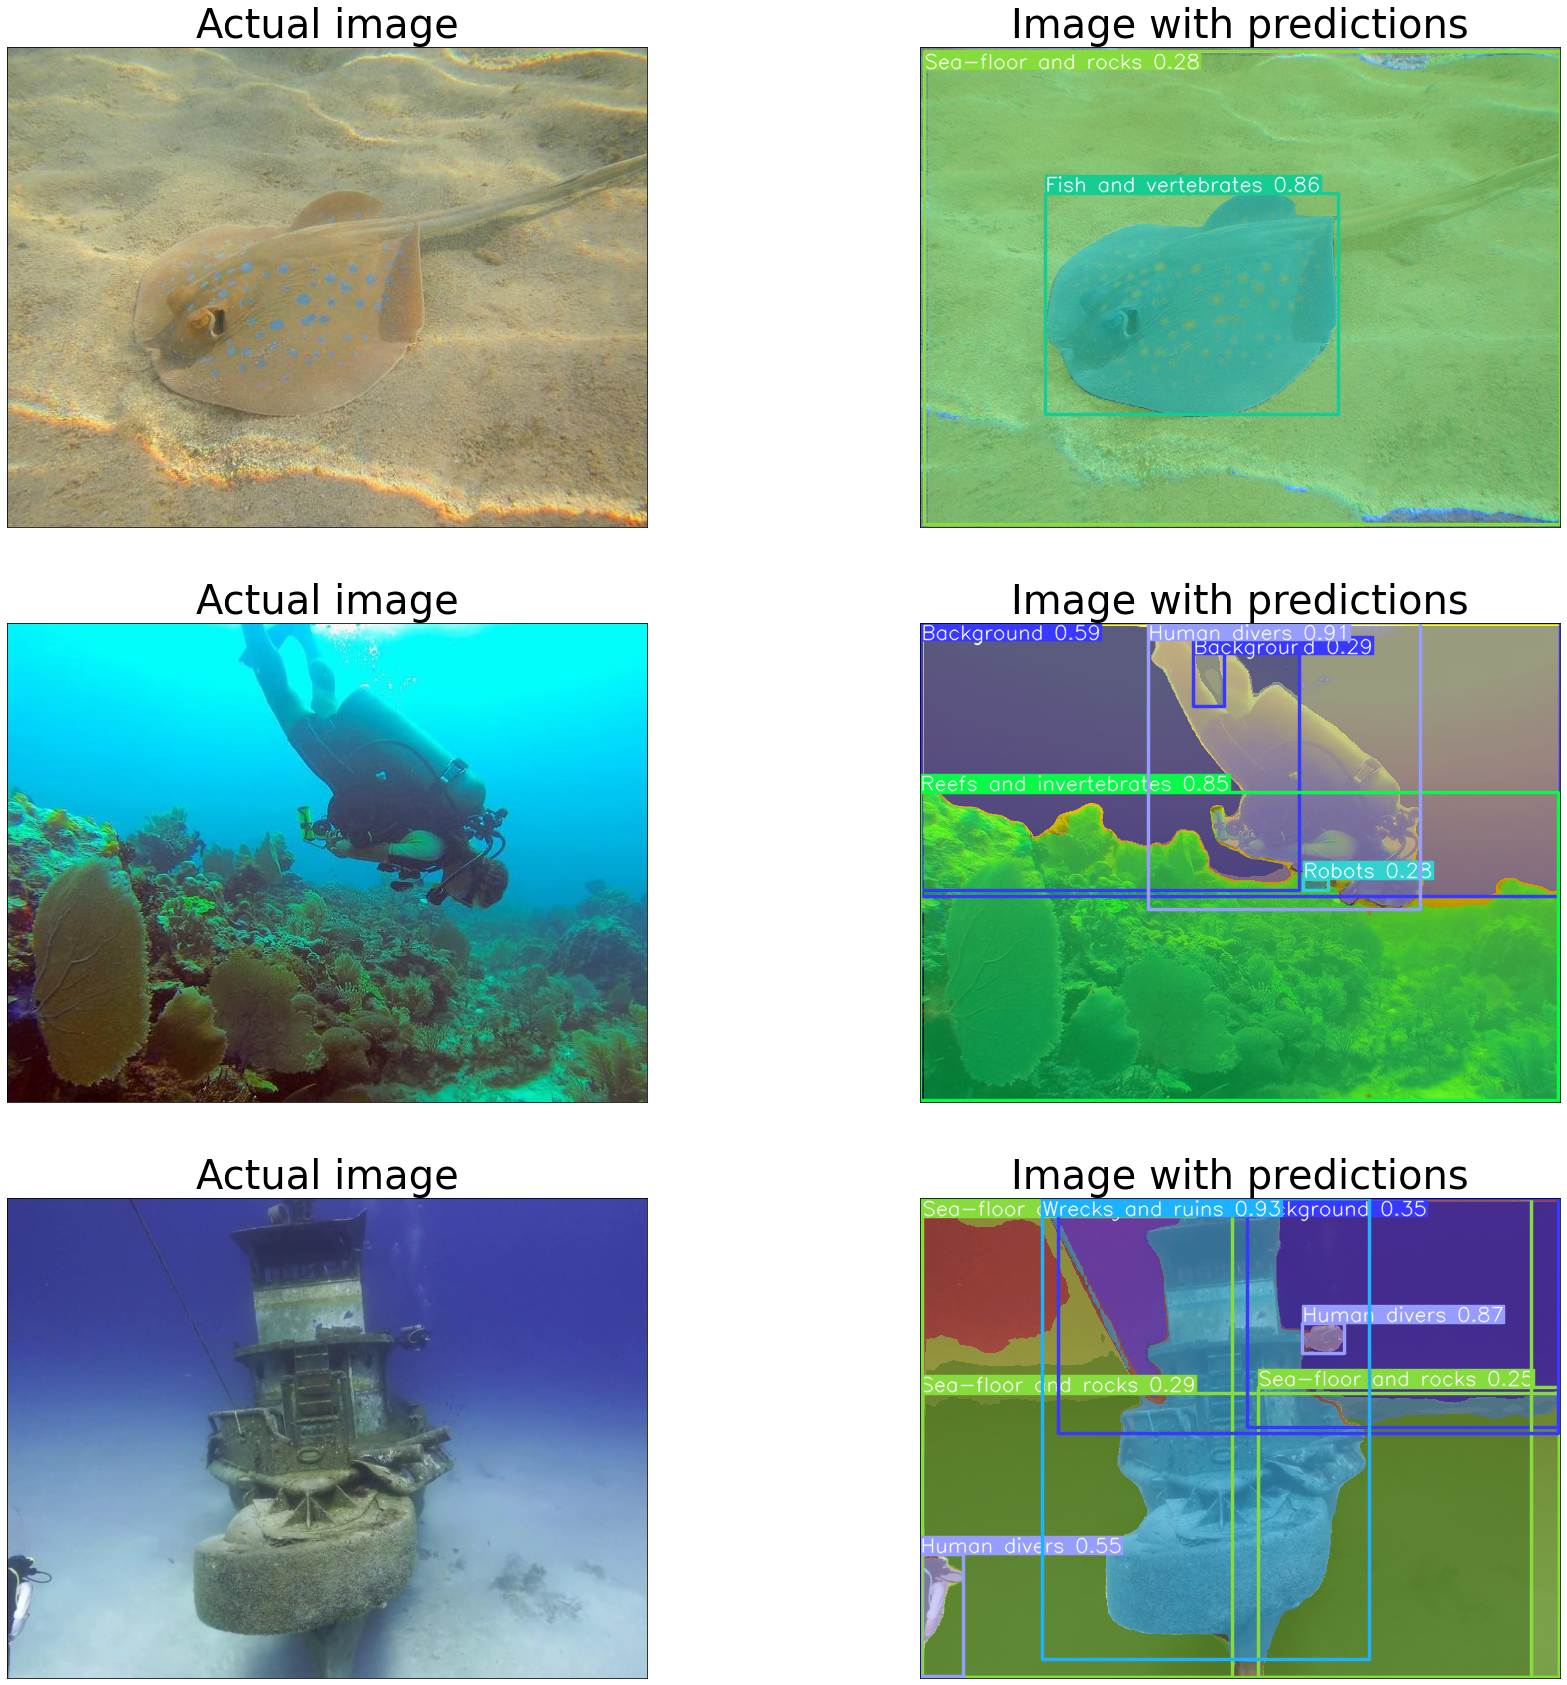

In [22]:
from ultralytics import YOLO  # Replace with the actual import statement for your YOLO module
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Instantiate the YOLO model
model = YOLO("weights/best.pt")  # Replace with the actual path to your trained weights

# Load and preprocess the image
plt.figure(figsize=(30,30))
test_images_path = 'predict/'
test_imgs_list = sorted(os.listdir(test_images_path))
for i in range(1,6,2):
    m=random.randint(0, len(test_imgs_list)) # Selecting random image number from test dataset
    test_image=os.path.join(op_images_testpath, os.listdir(test_images_path)[m])
    ax=plt.subplot(3,2,i)
    
    # Display actual image
    plt.imshow(cv2.cvtColor(cv2.imread(test_image), cv2.COLOR_BGR2RGB)) 
    plt.xticks([])
    plt.yticks([])
    plt.title("Actual image", fontsize = 40)
    
    # Predict 
    res = model(test_image)
    res_plotted = res[0].plot()
    ax=plt.subplot(3,2,i+1)
    
    # Display image with predictions
    plt.imshow(res_plotted)
    plt.title("Image with predictions", fontsize = 40)
    plt.xticks([])
    plt.yticks([])



image 1/1 C:\Users\harsh\OneDrive\Desktop\real\predict\d_r_166_.jpg: 384x640 1 Background, 1 Human divers, 1 Fish and vertebrates, 2 Sea-floor and rockss, 2422.6ms
Speed: 9.7ms preprocess, 2422.6ms inference, 30.8ms postprocess per image at shape (1, 3, 384, 640)


([], [])

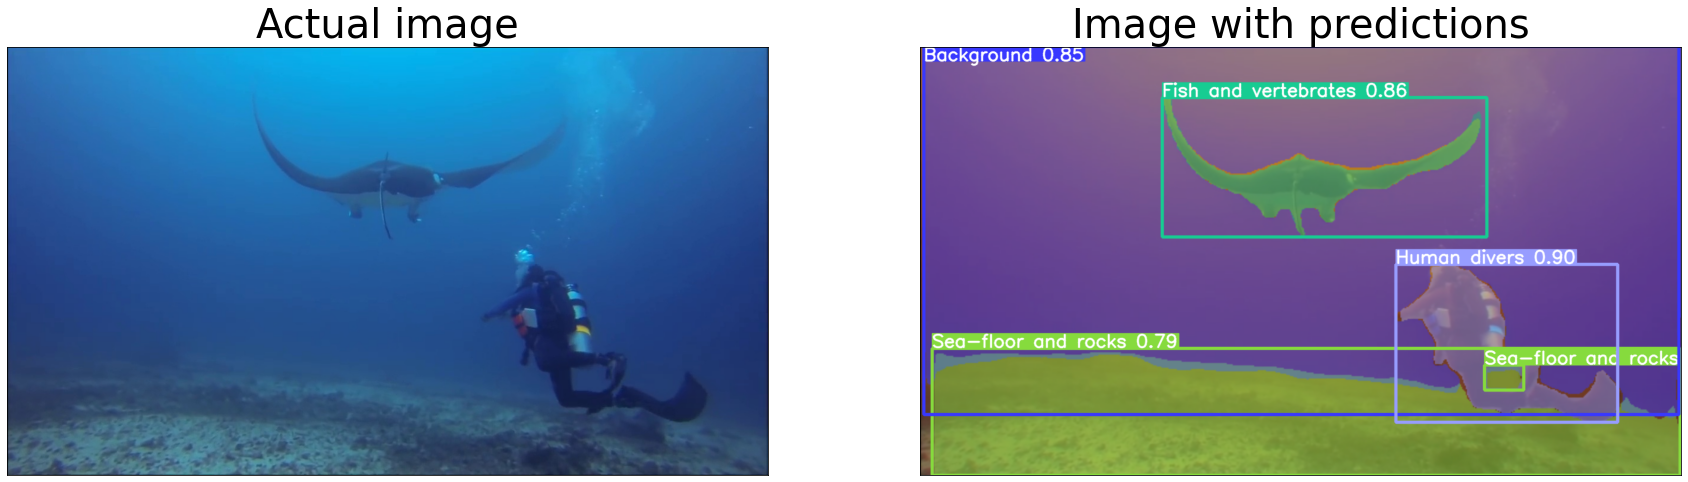

In [5]:
from ultralytics import YOLO  # Replace with the actual import statement for your YOLO module
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Instantiate the YOLO model
model = YOLO("weights/best.pt")  # Replace with the actual path to your trained weights

# Load and preprocess the image
plt.figure(figsize=(30,30))
test_image= "predict/d_r_166_.jpg"
ax=plt.subplot(3,2,1) 
plt.imshow(cv2.cvtColor(cv2.imread(test_image), cv2.COLOR_BGR2RGB)) 
plt.xticks([])
plt.yticks([])
plt.title("Actual image", fontsize = 40)
  
    # Predict 
res = model(test_image)
res_plotted = res[0].plot()
ax=plt.subplot(3,2,2)
    
    # Display image with predictions
plt.imshow(res_plotted)
plt.title("Image with predictions", fontsize = 40)
plt.xticks([])
plt.yticks([])
